# Student Analysis

An analysis of IT and SIB student registrant

### Goals

- make a prediction using multiple linear regression (MLR) on these data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Data_AWAHAB_REV.csv', sep=';')
df.head()

,Unnamed: 0,P_SMA_TI,P_SMK_TI,P_MA_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,P_SMA_SI,P_SMK_SI,P_MA_SI,IU_SMA_SI,IU_SMK_SI,IU_MA_SI,Jml_Mhs_TI,Jml_Mhs_SI,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,2023,235,117,39,208,104,35,142,71,24,125,63,21,346,209,NaN,NaN,NaN,137.0,"0,246846847"
1,2022,344,172,57,304,152,51,129,65,22,115,57,19,507,191,NaN,NaN,NaN,NaN,NaN
2,2021,199,99,33,176,88,29,106,53,18,94,47,16,293,157,NaN,NaN,NaN,NaN,NaN
3,2020,162,81,27,143,72,24,86,43,14,76,38,13,239,127,NaN,NaN,NaN,NaN,NaN
4,2019,138,69,23,122,61,20,62,31,10,55,28,9,204,92,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'P_SMA_TI', 'P_SMK_TI', 'P_MA_TI', ' IU_SMA_TI ',
       ' IU_SMK_TI ', ' IU_MA_TI ', 'P_SMA_SI', 'P_SMK_SI', 'P_MA_SI',
       'IU_SMA_SI', 'IU_SMK_SI', 'IU_MA_SI', 'Jml_Mhs_TI', 'Jml_Mhs_SI',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     int64  
 1   P_SMA_TI     11 non-null     int64  
 2   P_SMK_TI     11 non-null     int64  
 3   P_MA_TI      11 non-null     int64  
 4    IU_SMA_TI   11 non-null     int64  
 5    IU_SMK_TI   11 non-null     int64  
 6    IU_MA_TI    11 non-null     int64  
 7   P_SMA_SI     11 non-null     int64  
 8   P_SMK_SI     11 non-null     int64  
 9   P_MA_SI      11 non-null     int64  
 10  IU_SMA_SI    11 non-null     int64  
 11  IU_SMK_SI    11 non-null     int64  
 12  IU_MA_SI     11 non-null     int64  
 13  Jml_Mhs_TI   11 non-null     int64  
 14  Jml_Mhs_SI   11 non-null     int64  
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  2 non-null      float64
 19  Unnamed: 1

In [6]:
df.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
df.set_index('year', inplace=True)
df.head()


,P_SMA_TI,P_SMK_TI,P_MA_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,P_SMA_SI,P_SMK_SI,P_MA_SI,IU_SMA_SI,IU_SMK_SI,IU_MA_SI,Jml_Mhs_TI,Jml_Mhs_SI,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
year,,,,,,,,,,,,,,,,,,,
2023,235,117,39,208,104,35,142,71,24,125,63,21,346,209,NaN,NaN,NaN,137.0,"0,246846847"
2022,344,172,57,304,152,51,129,65,22,115,57,19,507,191,NaN,NaN,NaN,NaN,NaN
2021,199,99,33,176,88,29,106,53,18,94,47,16,293,157,NaN,NaN,NaN,NaN,NaN
2020,162,81,27,143,72,24,86,43,14,76,38,13,239,127,NaN,NaN,NaN,NaN,NaN
2019,138,69,23,122,61,20,62,31,10,55,28,9,204,92,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove any column with name unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,P_SMA_TI,P_SMK_TI,P_MA_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,P_SMA_SI,P_SMK_SI,P_MA_SI,IU_SMA_SI,IU_SMK_SI,IU_MA_SI,Jml_Mhs_TI,Jml_Mhs_SI
year,,,,,,,,,,,,,,
2023,235,117,39,208,104,35,142,71,24,125,63,21,346,209
2022,344,172,57,304,152,51,129,65,22,115,57,19,507,191
2021,199,99,33,176,88,29,106,53,18,94,47,16,293,157
2020,162,81,27,143,72,24,86,43,14,76,38,13,239,127
2019,138,69,23,122,61,20,62,31,10,55,28,9,204,92


In [8]:
df.head()

,P_SMA_TI,P_SMK_TI,P_MA_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,P_SMA_SI,P_SMK_SI,P_MA_SI,IU_SMA_SI,IU_SMK_SI,IU_MA_SI,Jml_Mhs_TI,Jml_Mhs_SI
year,,,,,,,,,,,,,,
2023,235,117,39,208,104,35,142,71,24,125,63,21,346,209
2022,344,172,57,304,152,51,129,65,22,115,57,19,507,191
2021,199,99,33,176,88,29,106,53,18,94,47,16,293,157
2020,162,81,27,143,72,24,86,43,14,76,38,13,239,127
2019,138,69,23,122,61,20,62,31,10,55,28,9,204,92


In [9]:
# round the df values to integer
df = df.round(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2023 to 2013
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   P_SMA_TI     11 non-null     int64
 1   P_SMK_TI     11 non-null     int64
 2   P_MA_TI      11 non-null     int64
 3    IU_SMA_TI   11 non-null     int64
 4    IU_SMK_TI   11 non-null     int64
 5    IU_MA_TI    11 non-null     int64
 6   P_SMA_SI     11 non-null     int64
 7   P_SMK_SI     11 non-null     int64
 8   P_MA_SI      11 non-null     int64
 9   IU_SMA_SI    11 non-null     int64
 10  IU_SMK_SI    11 non-null     int64
 11  IU_MA_SI     11 non-null     int64
 12  Jml_Mhs_TI   11 non-null     int64
 13  Jml_Mhs_SI   11 non-null     int64
dtypes: int64(14)
memory usage: 1.3 KB


In [10]:
# Split Data into TI and SI
df_ti = df.filter(regex='TI')
df_si = df.filter(regex='SI')

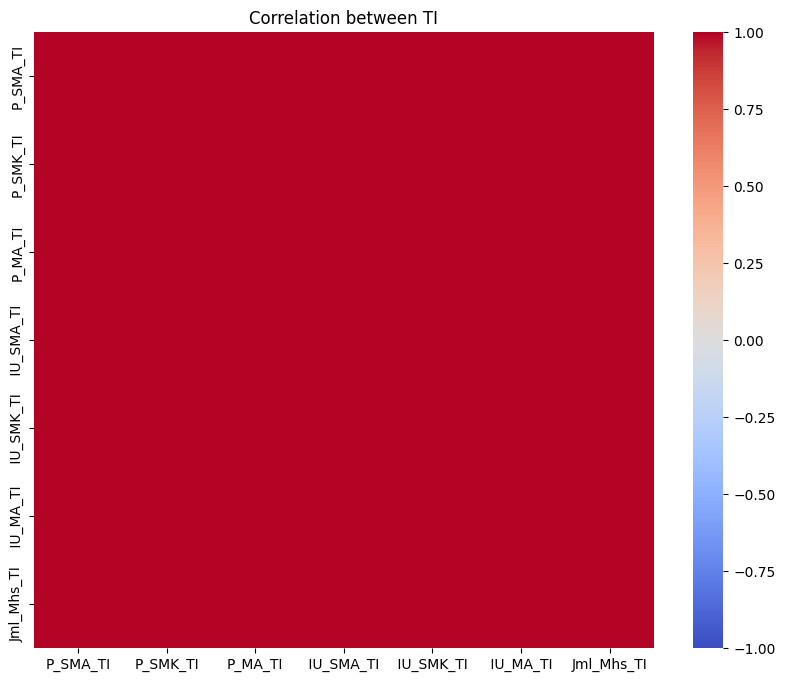

In [11]:
plt.figure(figsize=(10,8))
plt.title('Correlation between TI')
sns.heatmap(df_ti.corr(), cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

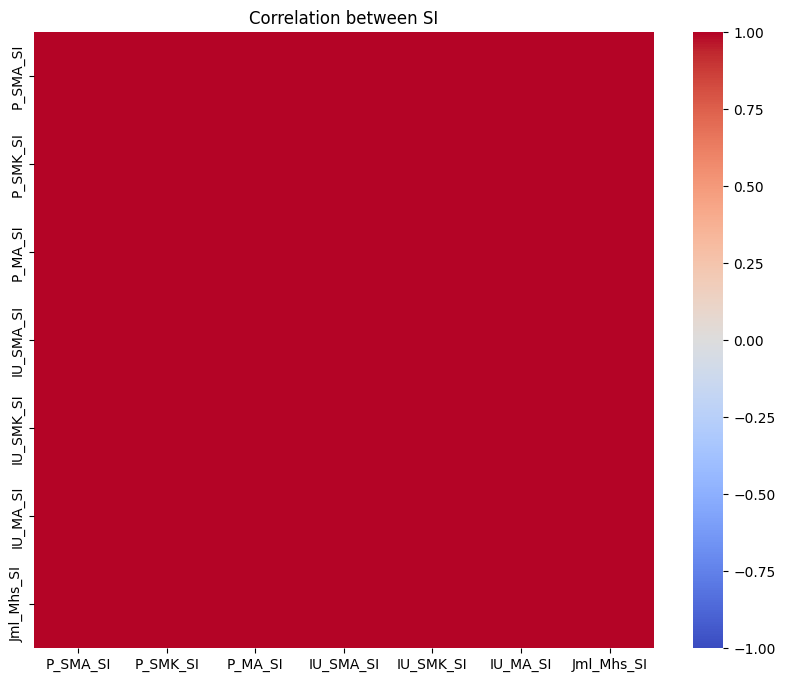

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlation between SI')
sns.heatmap(df_si.corr(), cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

### Data Explaination

P = Pendaftar

IU = ikut ujian


R2 Score: 0.9999874804695325
Mean Squared Error: 0.06944444444440023
Mean Absolute Error: 0.25925925925917187
Columns: Index(['P_SMA_TI', 'P_SMK_TI', 'P_MA_TI', ' IU_SMA_TI ', ' IU_SMK_TI ',
       ' IU_MA_TI '],
      dtype='object')
Coefficient: [114.78164988  29.11619972   3.62859018 -28.92852183 -20.13421132
  -1.90515869]
Intercept: 270.5
P_SMA_TI : 114.78164987677823
P_SMK_TI : 29.11619972488819
P_MA_TI : 3.6285901761804915
 IU_SMA_TI  : -28.92852182534662
 IU_SMK_TI  : -20.134211322199015
 IU_MA_TI  : -1.9051586888314196


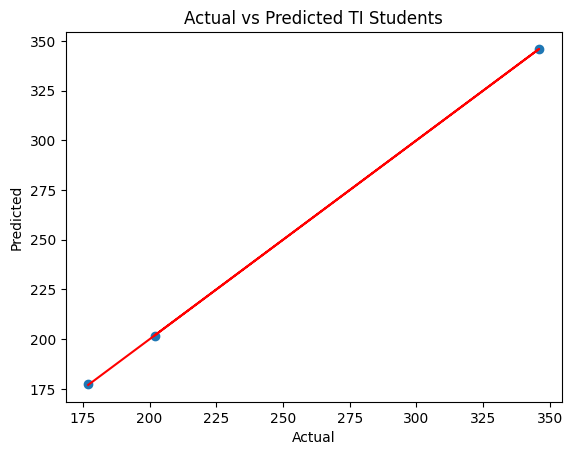

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

scaler = StandardScaler()
X = df_ti.drop(columns='Jml_Mhs_TI')
y = df_ti['Jml_Mhs_TI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Coefficients
print(f"Columns: {X.columns}")
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
for col in X.columns:
    print(f"{col} : {model.coef_[X.columns.get_loc(col)]}")

plt.plot(y_test, y_pred, 'o')
# line plot linear regression
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted TI Students')
plt.show()

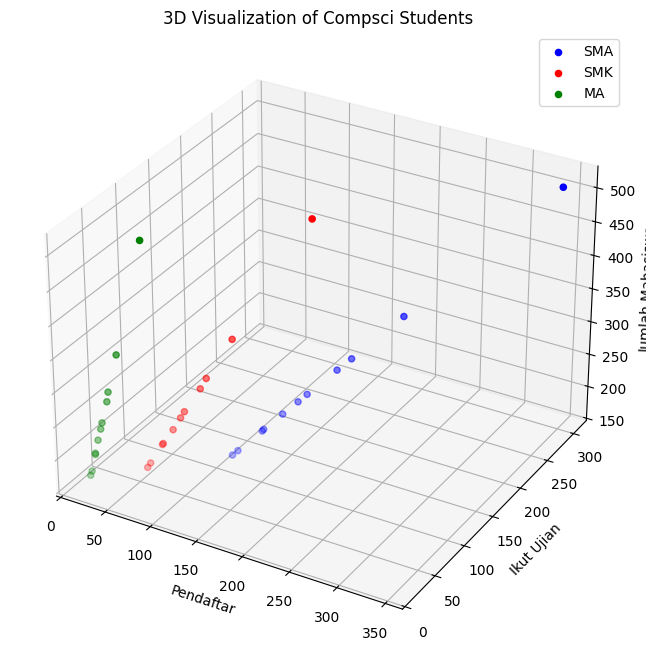

In [40]:
# 3D Visualization 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['P_SMA_TI'], X[' IU_SMA_TI '], y, c='b', marker='o')
ax.scatter(X['P_SMK_TI'], X[' IU_SMK_TI '], y, c='r', marker='o')
ax.scatter(X['P_MA_TI'], X[' IU_MA_TI '], y, c='g', marker='o')
ax.set_xlabel('Pendaftar')
ax.set_ylabel('Ikut Ujian')
ax.set_zlabel('Jumlah Mahasiswa')
ax.set_title('3D Visualization of Compsci Students')
plt.legend(['SMA', 'SMK', 'MA'])
plt.show()


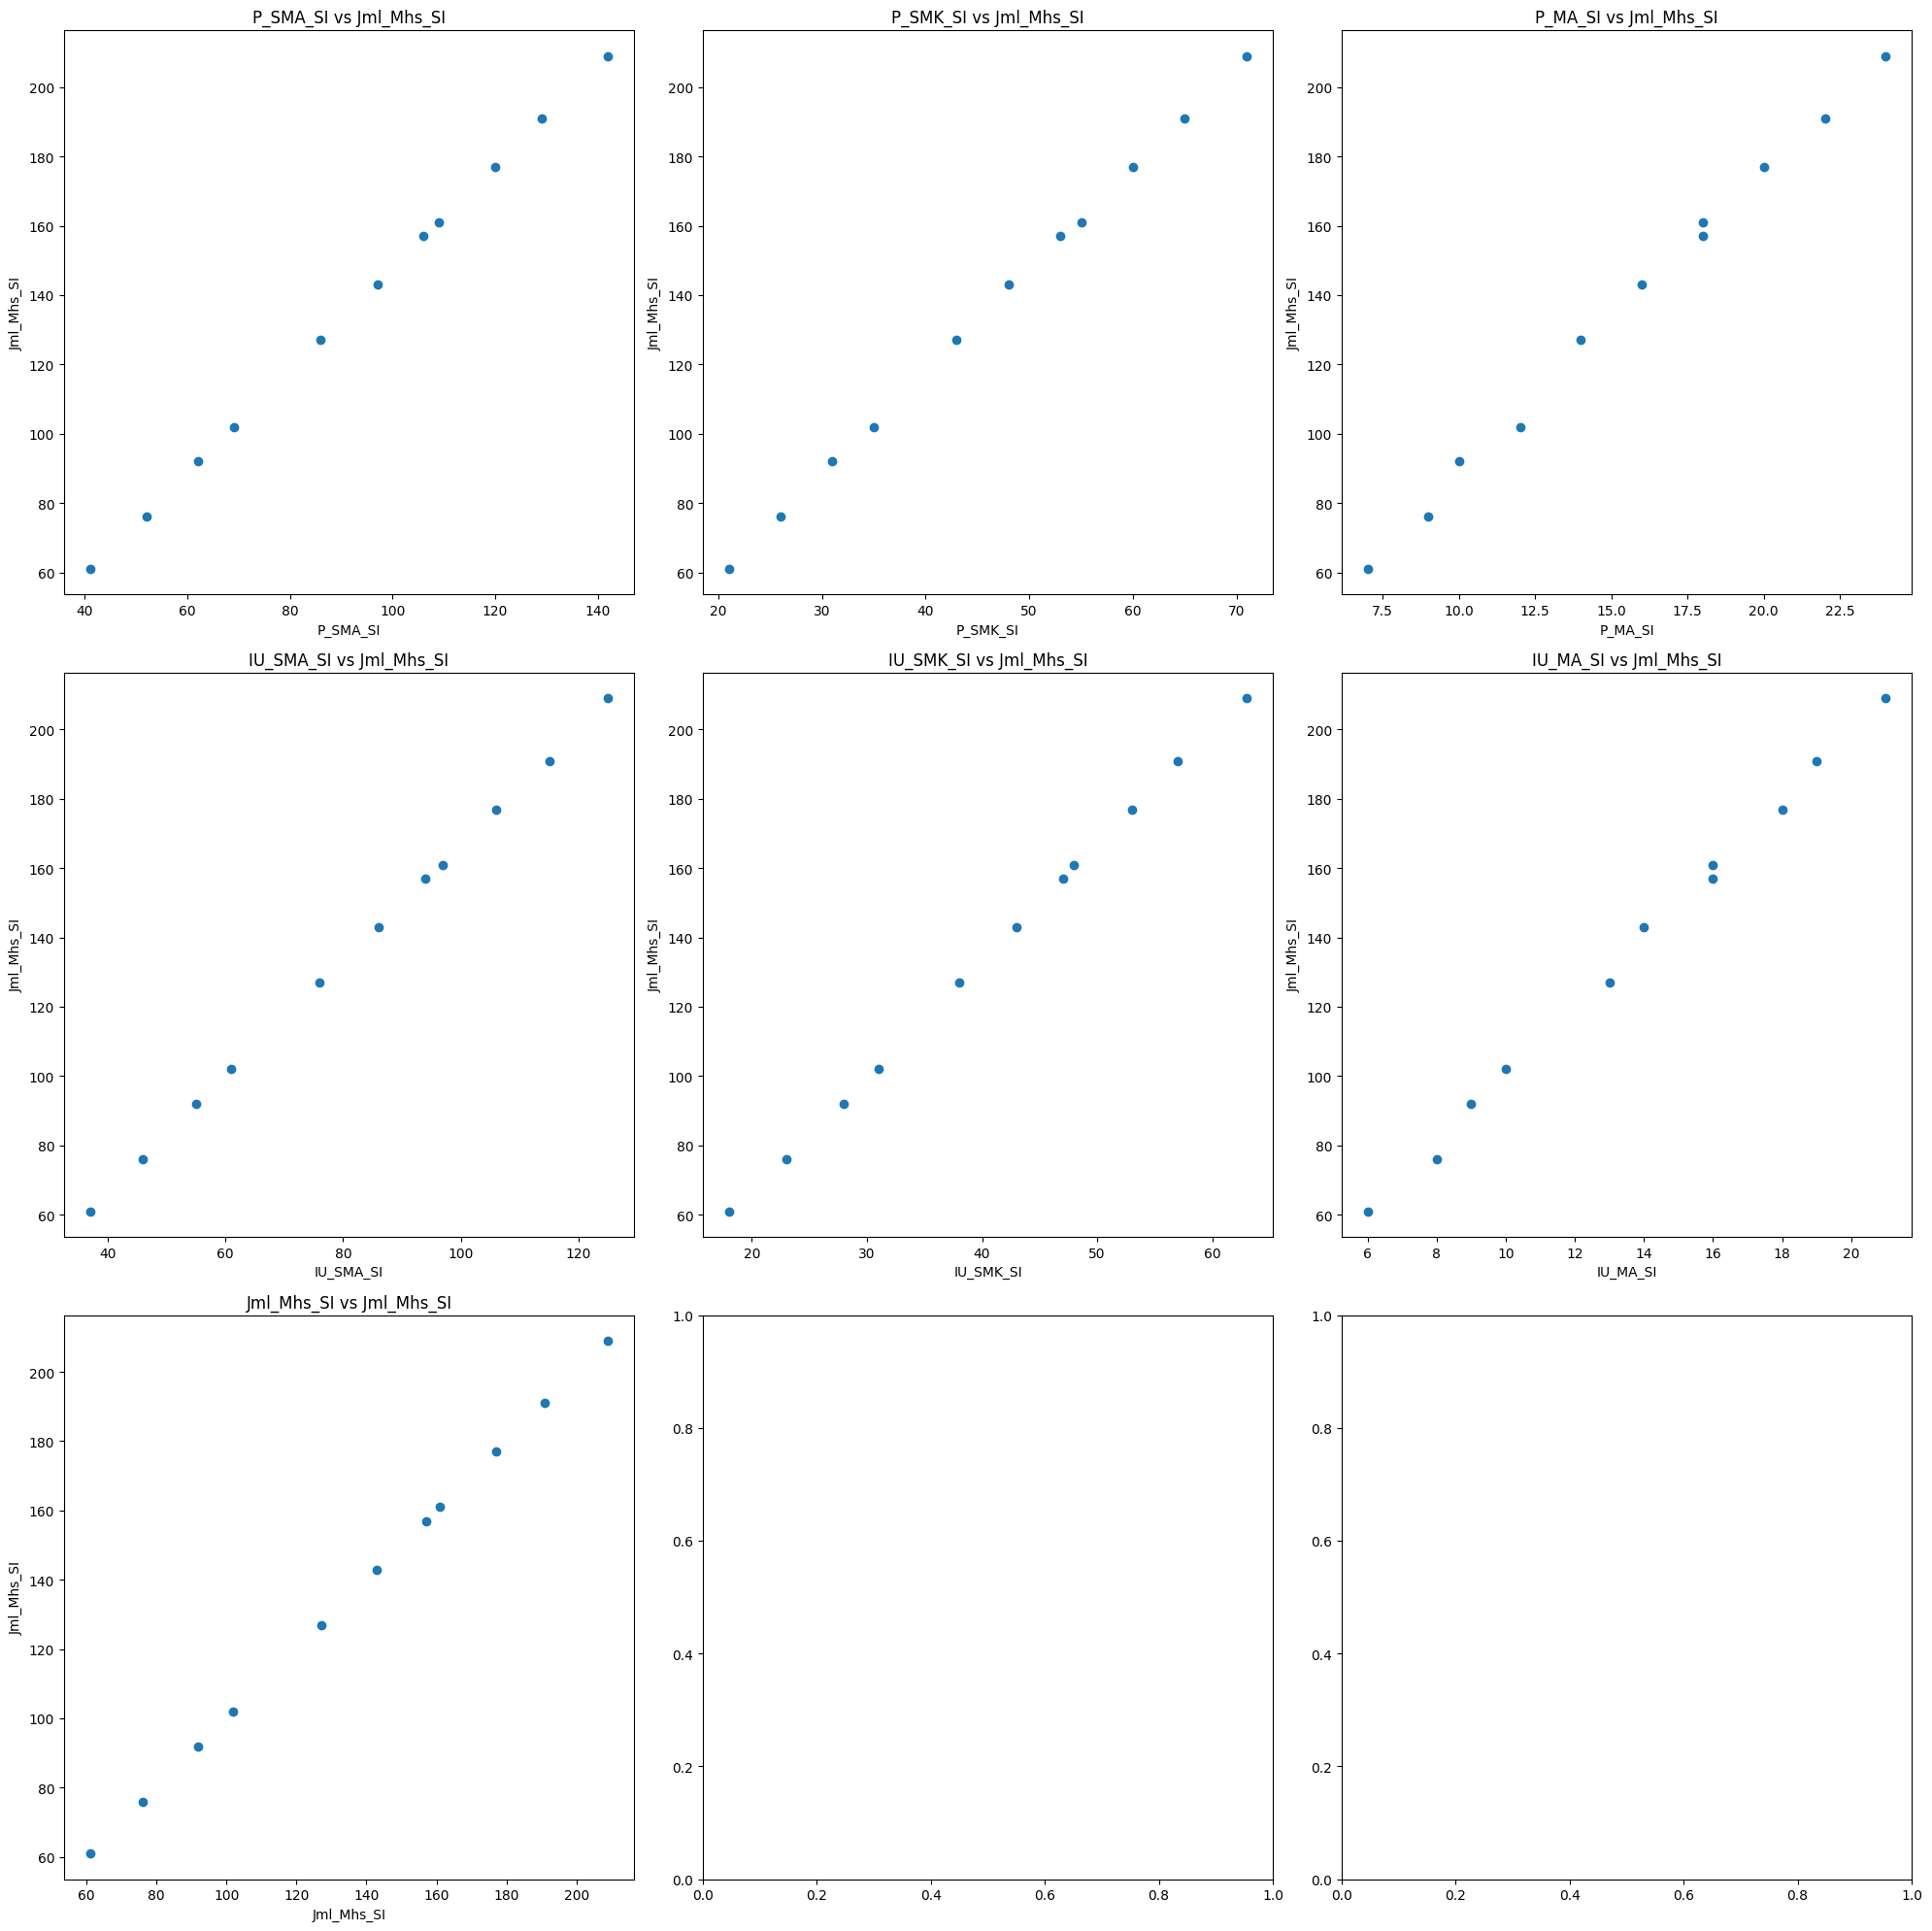

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()
for i, column in enumerate(df_si.columns):
    axes[i].scatter(df_si[column], df['Jml_Mhs_SI'])
    axes[i].set_title(f'{column} vs Jml_Mhs_SI')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Jml_Mhs_SI')
plt.tight_layout()
plt.show()


R2 Score: 0.9998897788228378
Mean Squared Error: 0.3333333333333523
Mean Absolute Error: 0.33333333333336174
Coefficient: 4.082925512329323e-15
Intercept: 8.526512829121202e-14


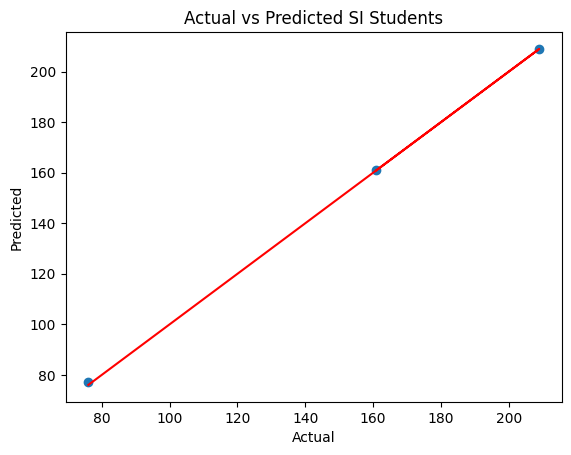

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

scaler = StandardScaler()
X = df_si.drop(columns='Jml_Mhs_SI')
y = df_si['Jml_Mhs_SI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

plt.plot(y_test, y_pred, 'o')
# line plot linear regression
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted SI Students')
plt.show()